In [196]:
import requests
import pandas as pd

def get_1day_sticks_of_1year(coin, year):
    url = f"https://api.upbit.com/v1/candles/days?market=KRW-{coin}&to={year}-12-31%2012%3A59%3A59&count=200"
    headers = {"accept": "application/json"}
    response = requests.get(url, headers=headers)
    print(response)
    df = pd.DataFrame(response.json()).sort_values('candle_date_time_utc').reset_index().drop(columns='index')

    df2 = pd.DataFrame()
    url = f"https://api.upbit.com/v1/candles/days?market=KRW-{coin}&to={year}-06-14%2012%3A59%3A59&count=200"
    headers = {"accept": "application/json"}
    response = requests.get(url, headers=headers)
    print(response)
    df2 = pd.DataFrame(response.json()).sort_values('candle_date_time_utc').reset_index().drop(columns='index')   
    
    result = pd.concat([df2,df]).reset_index().drop(columns='index').drop_duplicates()
    return result

coin = 'BORA'
year = 2021
df = get_1day_sticks_of_1year(coin,year)
df

<Response [200]>
<Response [200]>


,market,candle_date_time_utc,candle_date_time_kst,opening_price,high_price,low_price,trade_price,timestamp,candle_acc_trade_price,candle_acc_trade_volume,prev_closing_price,change_price,change_rate
0,KRW-BORA,2020-11-27T00:00:00,2020-11-27T09:00:00,28.4,30.0,27.5,28.2,1606521474110,6.272198e+08,2.199215e+07,28.6,-0.4,-0.013986
1,KRW-BORA,2020-11-28T00:00:00,2020-11-28T09:00:00,28.2,30.0,27.8,29.6,1606607976036,4.956532e+08,1.713867e+07,28.2,1.4,0.049645
2,KRW-BORA,2020-11-29T00:00:00,2020-11-29T09:00:00,29.6,31.1,28.9,30.1,1606694288144,9.096083e+08,3.021065e+07,29.6,0.5,0.016892
3,KRW-BORA,2020-11-30T00:00:00,2020-11-30T09:00:00,30.1,30.2,28.9,29.9,1606780713159,5.475998e+08,1.857316e+07,30.1,-0.2,-0.006645
4,KRW-BORA,2020-12-01T00:00:00,2020-12-01T09:00:00,30.0,31.7,29.1,30.6,1606867196161,1.020557e+09,3.371109e+07,29.9,0.7,0.023411
...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,KRW-BORA,2021-12-27T00:00:00,2021-12-27T09:00:00,1300.0,1305.0,1260.0,1270.0,1640649597830,4.567952e+10,3.576390e+07,1305.0,-35.0,-0.026820
396,KRW-BORA,2021-12-28T00:00:00,2021-12-28T09:00:00,1270.0,1315.0,1130.0,1170.0,1640735999270,9.875137e+10,7.992406e+07,1270.0,-100.0,-0.078740
397,KRW-BORA,2021-12-29T00:00:00,2021-12-29T09:00:00,1170.0,1190.0,1075.0,1110.0,1640822399945,6.395616e+10,5.668761e+07,1170.0,-60.0,-0.051282
398,KRW-BORA,2021-12-30T00:00:00,2021-12-30T09:00:00,1110.0,1145.0,1065.0,1120.0,1640908789312,4.293673e+10,3.868184e+07,1110.0,10.0,0.009009


### DMI, ADX 구하기

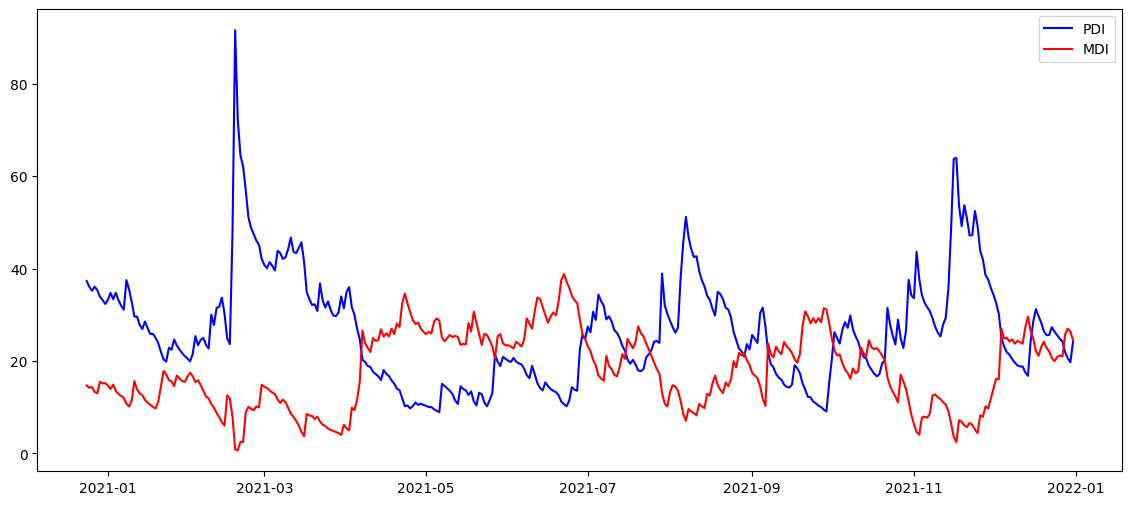

In [197]:
import pandas as pd

import ta
import ta.utils
high = df['high_price'].astype('float')
low = df['low_price'].astype('float')
close = df['trade_price'].astype('float')
adx = ta.trend.ADXIndicator(high=high, low=low, close=close)

df['ADX'] = adx.adx().astype('float')
df['PDI'] = adx.adx_pos().astype('float')
df['MDI'] = adx.adx_neg().astype('float')
df['candle_date_time_utc'] = pd.to_datetime(df['candle_date_time_utc'])

import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(14,6))
df_mat = df.copy()
plt.plot(df_mat['candle_date_time_utc'][27:], df_mat['PDI'][27:], color = 'b', label = 'PDI')
plt.plot(df_mat['candle_date_time_utc'][27:], df_mat['MDI'][27:], color = 'r', label = 'MDI')
plt.legend()
plt.show()

In [198]:
df[34:].head(10)

,market,candle_date_time_utc,candle_date_time_kst,opening_price,high_price,low_price,trade_price,timestamp,candle_acc_trade_price,candle_acc_trade_volume,prev_closing_price,change_price,change_rate,ADX,PDI,MDI
34,KRW-BORA,2020-12-31,2020-12-31T09:00:00,31.9,32.4,30.7,32.3,1609459152473,9.080821e+08,2.893832e+07,31.8,0.5,0.015723,54.394202,32.339662,15.227785
35,KRW-BORA,2021-01-01,2021-01-01T09:00:00,32.2,33.7,31.4,33.7,1609545588361,1.593478e+09,4.888858e+07,32.3,1.4,0.043344,53.271822,33.205891,14.682308
36,KRW-BORA,2021-01-02,2021-01-02T09:00:00,33.7,35.7,32.6,34.1,1609631995812,2.632240e+09,7.791731e+07,33.7,0.4,0.011869,52.516336,34.753390,13.956640
37,KRW-BORA,2021-01-03,2021-01-03T09:00:00,34.1,34.1,31.7,32.7,1609718394252,2.236392e+09,6.890345e+07,34.1,-1.4,-0.041056,51.501405,33.377962,14.888411
38,KRW-BORA,2021-01-04,2021-01-04T09:00:00,32.7,36.9,31.1,33.1,1609804782062,6.016112e+09,1.783633e+08,32.7,0.4,0.012232,50.970546,34.769168,13.498091
39,KRW-BORA,2021-01-05,2021-01-05T09:00:00,32.9,34.7,31.8,33.9,1609891197698,3.672088e+09,1.103826e+08,33.1,0.8,0.024169,50.477605,33.104571,12.851861
40,KRW-BORA,2021-01-06,2021-01-06T09:00:00,33.8,34.2,32.2,34.0,1609977591933,2.628521e+09,7.952108e+07,33.9,0.1,0.002950,50.019873,31.967873,12.410572
41,KRW-BORA,2021-01-07,2021-01-07T09:00:00,34.0,34.2,32.7,34.2,1610063998112,2.839844e+09,8.485271e+07,34.0,0.2,0.005882,49.594837,31.105219,12.075673
42,KRW-BORA,2021-01-08,2021-01-08T09:00:00,34.0,39.9,33.5,37.8,1610150395303,1.716363e+10,4.693756e+08,34.2,3.6,0.105263,50.013780,37.498748,10.743551
43,KRW-BORA,2021-01-09,2021-01-09T09:00:00,37.8,38.2,35.1,38.2,1610236791168,3.888252e+09,1.065760e+08,37.8,0.4,0.010582,50.402799,35.458338,10.158965


### ADX, SMA10 구하기

C:\Users\PSY\AppData\Local\Temp\ipykernel_26708\3507688218.py:19: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()
C:\Users\PSY\AppData\Local\Temp\ipykernel_26708\3507688218.py:32: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


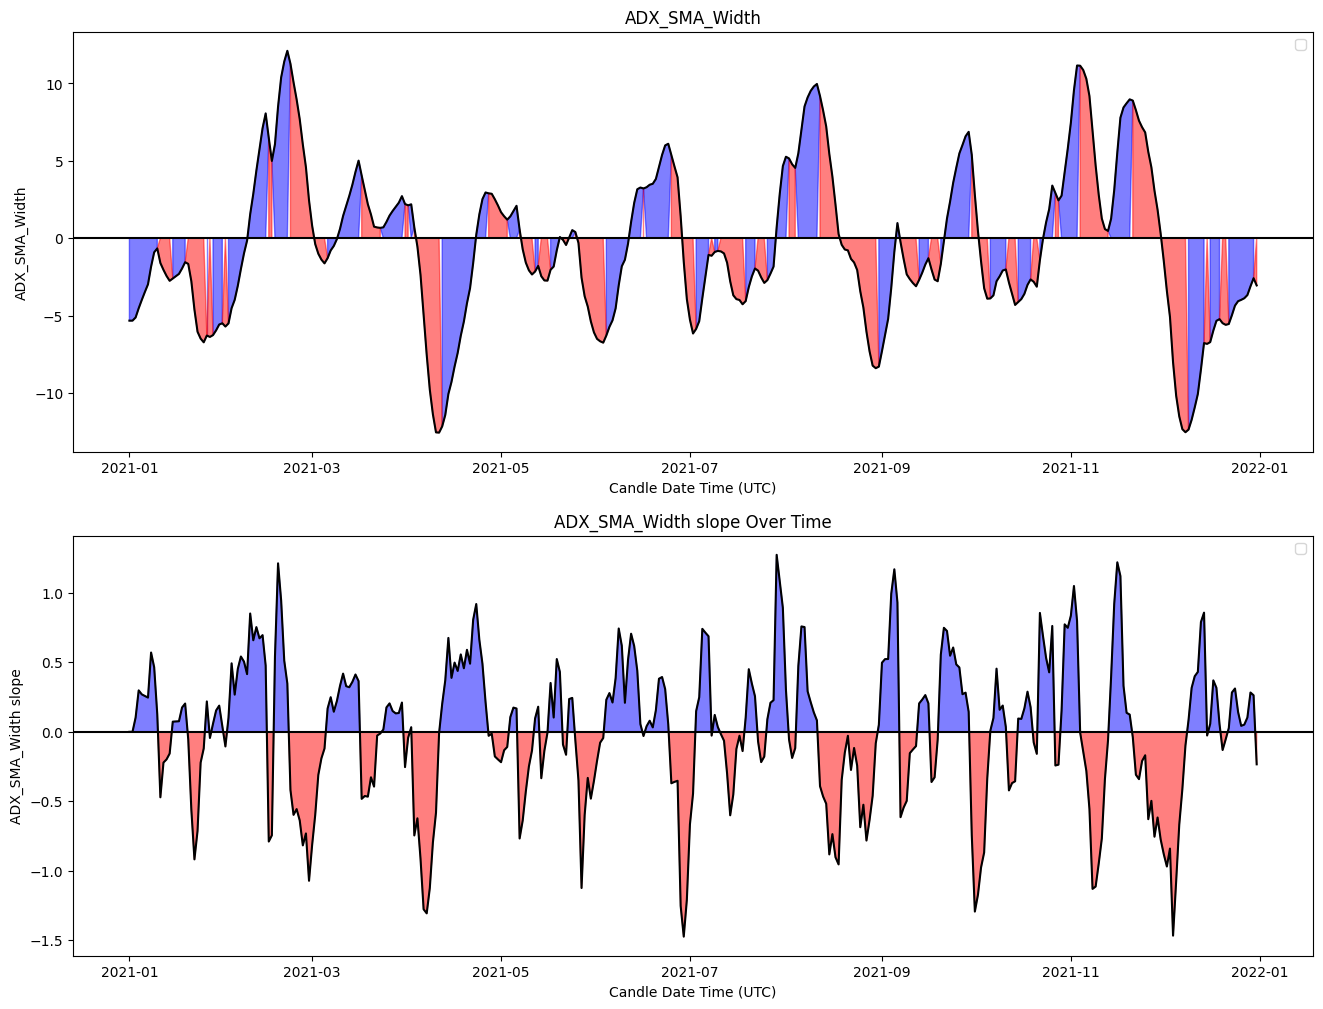

In [199]:
df['SMA_10'] = df['ADX'].rolling(window=10).mean()

df['ADX_SMA_width'] = df['ADX'] - df['SMA_10']
df.loc[35, 'ADX_SMA_width'] = df.loc[36, 'ADX_SMA_width']
df['ADX_SMA_slope'] = (df['ADX_SMA_width'] - df['ADX_SMA_width'].shift().fillna(df['ADX_SMA_width'])) /2
df.loc[35, 'ADX_SMA_slope'] = df.loc[36, 'ADX_SMA_slope']

plt.figure(figsize=(16,12))
plt.subplot(2,1,1)
plt.plot(df['candle_date_time_utc'][35:], df['ADX_SMA_width'][35:], color = 'black')
plt.axhline(y=0, color='black')
# Fill the area where width_slope is positive
plt.fill_between(df['candle_date_time_utc'][35:], df['ADX_SMA_width'][35:], where=(df['ADX_SMA_slope'][35:] >= 0), color='blue', alpha=0.5, interpolate=True)
# Fill the area where width_slope is negative
plt.fill_between(df['candle_date_time_utc'][35:], df['ADX_SMA_width'][35:], where=(df['ADX_SMA_slope'][35:] < 0), color='red', alpha=0.5, interpolate=True)
plt.xlabel('Candle Date Time (UTC)')
plt.ylabel('ADX_SMA_Width')
plt.title('ADX_SMA_Width')
plt.legend()

plt.subplot(2,1,2)
plt.plot(df['candle_date_time_utc'][35:], df['ADX_SMA_slope'][35:], color = 'black')

plt.axhline(y=0, color='black')
# Fill the area where width_slope is positive
plt.fill_between(df['candle_date_time_utc'][35:], df['ADX_SMA_slope'][35:], where=(df['ADX_SMA_slope'][35:] >= 0), color='blue', alpha=0.5, interpolate=True)
# Fill the area where width_slope is negative
plt.fill_between(df['candle_date_time_utc'][35:], df['ADX_SMA_slope'][35:], where=(df['ADX_SMA_slope'][35:] < 0), color='red', alpha=0.5, interpolate=True)
plt.xlabel('Candle Date Time (UTC)')
plt.ylabel('ADX_SMA_Width slope')
plt.title('ADX_SMA_Width slope Over Time')
plt.legend()

plt.show()


### BOL 구하기

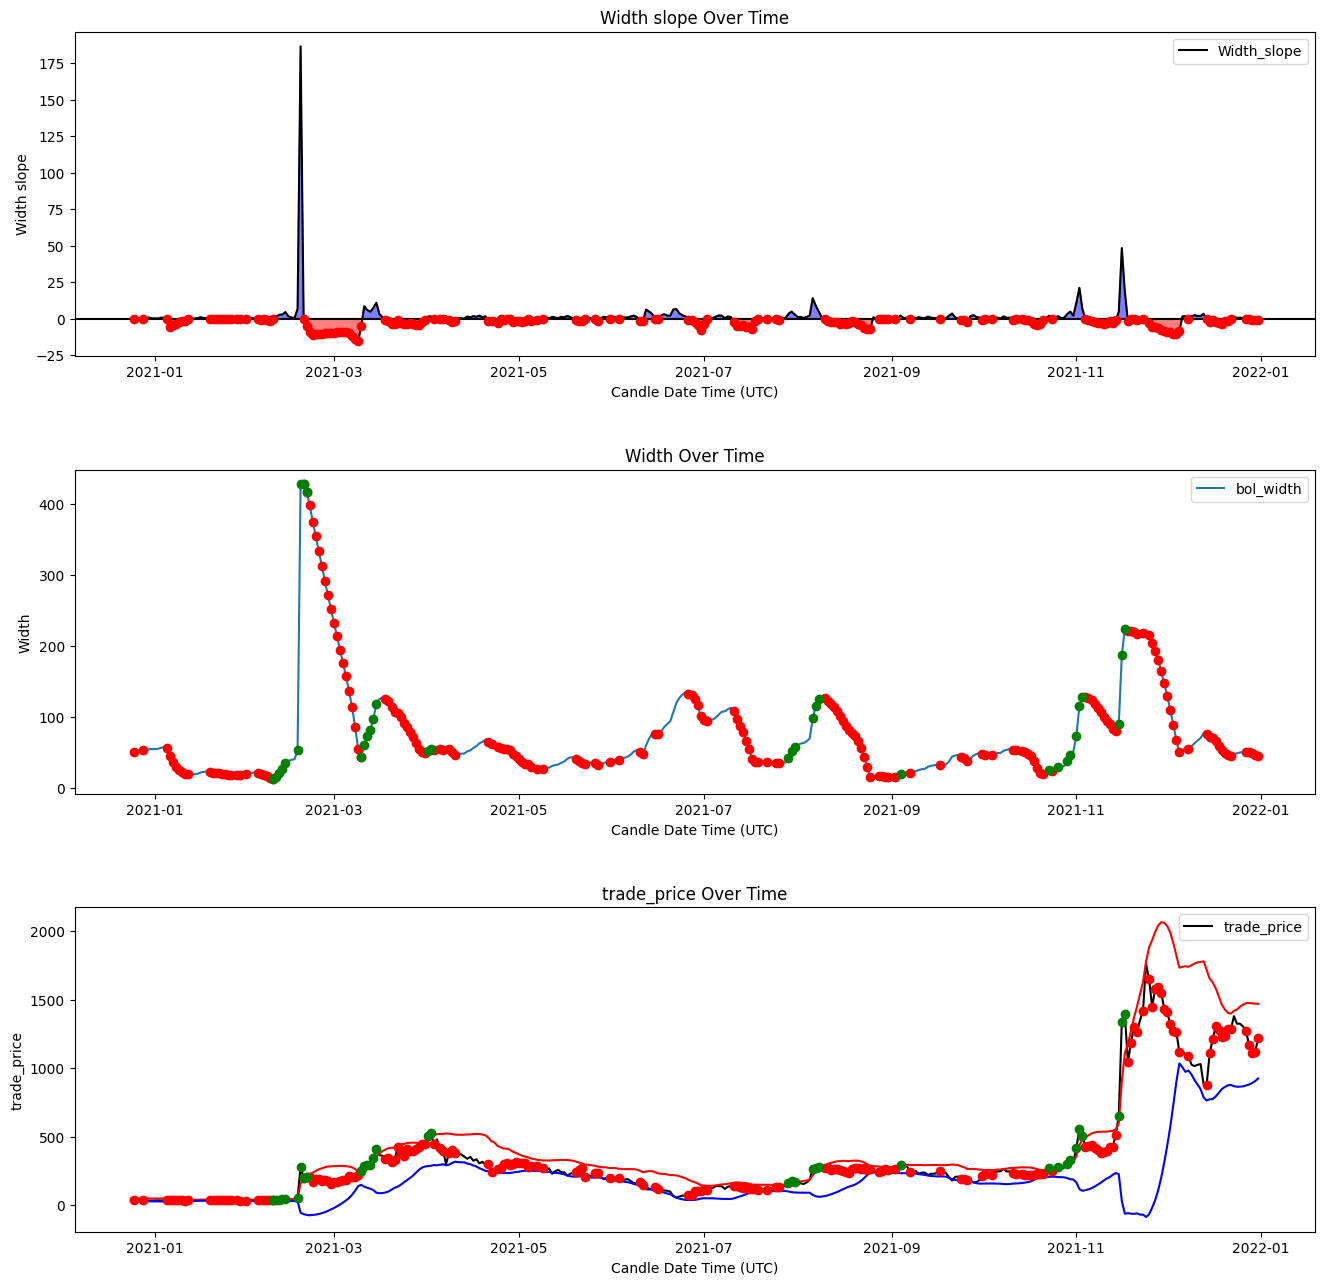

In [200]:
import matplotlib.pyplot as plt
import ta.volatility as tav

df['upper'] = tav.bollinger_hband(df['trade_price'])
df['lower'] = tav.bollinger_lband(df['trade_price'])
df['middle'] = tav.bollinger_mavg(df['trade_price'])
df['bol_width'] = tav.bollinger_wband(df['trade_price'])
df = df[27:]
df = df.reset_index(drop=['index'])

df['bol_width_slope'] = (df['bol_width'] - df['bol_width'].shift().fillna(df['bol_width'])) /2
df['bol_width_slope'] = df['bol_width_slope']

df_minus_width_slope = df.loc[df['bol_width_slope']<0]

df_breakout = df.loc[df['trade_price']>=df['upper']]

plt.figure(figsize=(16,15))

ax1 = plt.subplot(3,1,1)
plt.plot(df['candle_date_time_utc'], df['bol_width_slope'], color='black', label='Width_slope')
plt.axhline(y=0, color='black')
# plt.axhline(y=-1, color='red')
plt.plot(df_minus_width_slope['candle_date_time_utc'],df_minus_width_slope['bol_width_slope'], 'ro')
# Fill the area where bol_width_slope is positive
plt.fill_between(df['candle_date_time_utc'], df['bol_width_slope'], where=(df['bol_width_slope'] >= 0), color='blue', alpha=0.5, interpolate=True)
# Fill the area where bol_width_slope is negative
plt.fill_between(df['candle_date_time_utc'], df['bol_width_slope'], where=(df['bol_width_slope'] < 0), color='red', alpha=0.5, interpolate=True)
plt.xlabel('Candle Date Time (UTC)')
plt.ylabel('Width slope')
plt.title('Width slope Over Time')
plt.legend()

ax2 = plt.subplot(3,1,2, sharex=ax1)
plt.plot(df['candle_date_time_utc'], df['bol_width'], label='bol_width')
plt.plot(df_minus_width_slope['candle_date_time_utc'],df_minus_width_slope['bol_width'], 'ro')
plt.plot(df_breakout['candle_date_time_utc'], df_breakout['bol_width'], 'go')
plt.xlabel('Candle Date Time (UTC)')
plt.ylabel('Width')
plt.title('Width Over Time')
plt.legend()

ax3 = plt.subplot(3,1,3, sharex=ax1)
plt.plot(df['candle_date_time_utc'], df['trade_price'], color = 'black', label = 'trade_price')
plt.plot(df['candle_date_time_utc'], df['upper'], color = 'r')
plt.plot(df['candle_date_time_utc'], df['lower'], color = 'b')
plt.plot(df_minus_width_slope['candle_date_time_utc'], df_minus_width_slope['trade_price'], 'ro')
plt.plot(df_breakout['candle_date_time_utc'], df_breakout['trade_price'], 'go')
plt.xlabel('Candle Date Time (UTC)')
plt.ylabel('trade_price')
plt.title('trade_price Over Time')
plt.legend()

plt.subplots_adjust(left=0.125, bottom=0.1,  right=0.9, top=0.9, wspace=0.2, hspace=0.35)

plt.show()

### 매수시점

In [201]:
df['ADX_sign'] = False
for i in range(len(df)):
    if df.iloc[i]['ADX_SMA_slope']>=0:
        ADX_SMA_slope = 'plus'
        df.loc[i ,'ADX_sign'] = True

    elif df.iloc[i]['ADX_SMA_slope']<0:
        ADX_SMA_slope = 'minus'
df.loc[df['ADX_sign']]


df['DMI_sign'] = False
df.loc[df['PDI'] - df['MDI']>0, 'DMI_sign'] = True

bol_sign = False
df['bol_shrink'] = False
df['break_point'] = False
df.loc[df['bol_width_slope']<0, 'bol_shrink'] = True
df.loc[df['trade_price']>=df['upper'], 'break_point'] = True
df.loc[df['break_point']]

breakpoint_found = False
cnt = 0
for i in range(len(df)):
    if df.loc[i,'break_point'] :
        if not breakpoint_found:
            breakpoint_found = True
            cnt+=1
        else:
            df.loc[i,'break_point'] = False
            continue
    else: 
        if df.loc[i,'bol_shrink']:
            breakpoint_found = False
        else:
            continue

df.loc[df['break_point']]
# cnt

df.loc[df['break_point'] & df['ADX_sign'] & df['DMI_sign'], 'stat']= 'buy'
df.loc[df['stat']=='buy']

,market,candle_date_time_utc,candle_date_time_kst,opening_price,high_price,low_price,trade_price,timestamp,candle_acc_trade_price,candle_acc_trade_volume,...,upper,lower,middle,bol_width,bol_width_slope,ADX_sign,DMI_sign,bol_shrink,break_point,stat
47,KRW-BORA,2021-02-09,2021-02-09T09:00:00,34.9,38.5,34.8,36.7,1612915199999,1.225062e+10,3.340516e+08,...,36.374859,31.945141,34.16,12.967558,-0.582330,True,True,True,True,buy
76,KRW-BORA,2021-03-10,2021-03-10T09:00:00,217.0,253.0,198.0,246.0,1615420800314,1.341479e+11,5.939463e+08,...,232.308530,147.891470,190.10,44.406660,-5.362904,True,True,True,True,buy
217,KRW-BORA,2021-07-29,2021-07-29T09:00:00,138.0,199.0,136.0,160.0,1627603195060,1.755544e+11,1.083402e+09,...,153.501617,99.398383,126.45,42.786267,3.266542,True,True,False,True,buy
254,KRW-BORA,2021-09-04,2021-09-04T09:00:00,268.0,297.0,265.0,295.0,1630799998101,9.065857e+10,3.251353e+08,...,286.171181,232.328819,259.25,20.768510,2.089184,True,True,False,True,buy
303,KRW-BORA,2021-10-23,2021-10-23T09:00:00,244.0,274.0,238.0,272.0,1635033600167,9.331323e+10,3.647783e+08,...,264.857402,205.742598,235.30,25.123163,2.045247,True,True,False,True,buy
306,KRW-BORA,2021-10-26,2021-10-26T09:00:00,262.0,297.0,262.0,277.0,1635292800306,1.529639e+11,5.440199e+08,...,274.930644,204.169356,239.55,29.539256,1.683568,True,True,False,True,buy
326,KRW-BORA,2021-11-15,2021-11-15T09:00:00,513.0,758.0,474.0,652.0,1637020800108,1.382419e+12,2.107819e+09,...,598.905121,225.894879,412.40,90.448652,4.608537,True,True,False,True,buy


### 매도시점

In [202]:
df['comparison_ADX'] = df.apply(lambda row: '+' if row['ADX'] - row['SMA_10'] >= 0 else '-', axis=1)
df.loc[(df['comparison_ADX'].shift(1) == '+') & (df['comparison_ADX'] == '-'), 'stat'] = 'sell'
df.loc[df['stat']=='sell']

,market,candle_date_time_utc,candle_date_time_kst,opening_price,high_price,low_price,trade_price,timestamp,candle_acc_trade_price,candle_acc_trade_volume,...,lower,middle,bol_width,bol_width_slope,ADX_sign,DMI_sign,bol_shrink,break_point,stat,comparison_ADX
9,KRW-BORA,2021-01-02,2021-01-02T09:00:00,33.7,35.7,32.6,34.1,1609631995812,2.632240e+09,7.791731e+07,...,27.113680,37.560,55.624707,0.021100,True,True,False,False,sell,-
68,KRW-BORA,2021-03-02,2021-03-02T09:00:00,165.0,167.0,157.0,166.0,1614729591496,1.818631e+10,1.119630e+08,...,-9.530653,138.105,213.802038,-9.487413,False,True,True,False,sell,-
101,KRW-BORA,2021-04-04,2021-04-04T09:00:00,447.0,484.0,435.0,480.0,1617580800107,6.138427e+10,1.325256e+08,...,290.554495,404.300,56.267873,1.089268,False,True,False,False,sell,-
135,KRW-BORA,2021-05-08,2021-05-08T09:00:00,283.0,287.0,269.0,275.0,1620518397328,1.826576e+10,6.616436e+07,...,249.308941,289.150,27.557364,0.065929,False,False,False,False,sell,-
148,KRW-BORA,2021-05-21,2021-05-21T09:00:00,242.0,264.0,214.0,259.0,1621641598698,5.371200e+10,2.210003e+08,...,209.574055,259.500,38.478570,-1.580457,False,False,True,False,sell,-
153,KRW-BORA,2021-05-26,2021-05-26T09:00:00,214.0,240.0,206.0,236.0,1622073597602,1.837118e+10,8.159842e+07,...,200.436043,244.150,35.809098,-0.298590,False,False,True,False,sell,-
187,KRW-BORA,2021-06-29,2021-06-29T09:00:00,99.6,123.0,88.5,106.0,1625011199435,6.594235e+10,6.136205e+08,...,41.319043,100.020,117.378439,-4.157347,False,False,True,False,sell,-
238,KRW-BORA,2021-08-19,2021-08-19T09:00:00,238.0,275.0,234.0,265.0,1629417599672,1.637109e+11,6.278782e+08,...,141.651210,232.550,78.175695,-1.775594,False,True,True,False,sell,-
257,KRW-BORA,2021-09-07,2021-09-07T09:00:00,291.0,293.0,207.0,240.0,1631059200062,6.379035e+10,2.441727e+08,...,234.110276,263.300,22.172217,-0.197799,False,False,True,False,sell,-
283,KRW-BORA,2021-10-03,2021-10-03T09:00:00,228.0,232.0,215.0,226.0,1633305593711,2.558619e+10,1.140326e+08,...,157.687856,207.100,47.718150,0.154620,False,True,False,False,sell,-


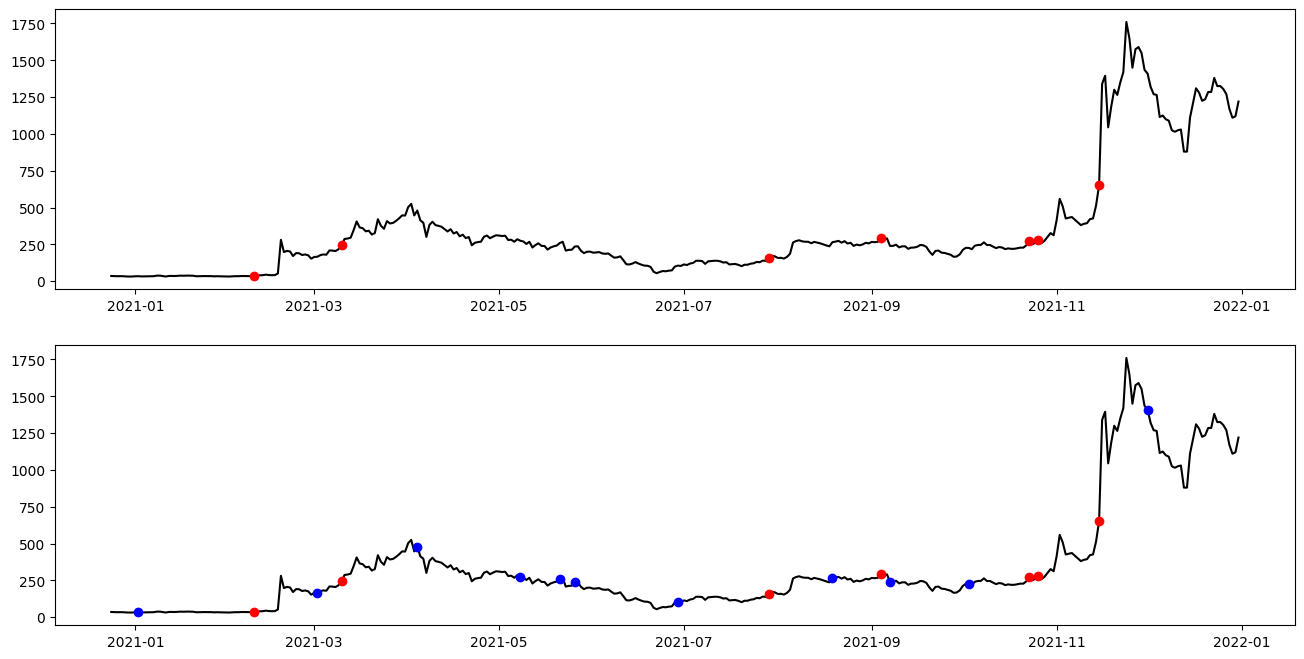

In [203]:
plt.figure(figsize=(16,8))

plt.subplot(2,1,1)
plt.plot(df['candle_date_time_utc'],df['trade_price'],color='black')
plt.plot(df.loc[df['stat']=='buy', 'candle_date_time_utc'], 
         df.loc[df['stat']=='buy', 'trade_price'], 'ro')
plt.subplot(2,1,2)
plt.plot(df['candle_date_time_utc'],df['trade_price'],color='black')
plt.plot(df.loc[df['stat']=='buy', 'candle_date_time_utc'], 
         df.loc[df['stat']=='buy', 'trade_price'], 'ro')
plt.plot(df.loc[df['stat']=='sell', 'candle_date_time_utc'],
         df.loc[df['stat']=='sell', 'trade_price'], 'bo')

plt.show()

### 트레이딩 결과

In [204]:
df_trade_info = pd.concat([df.loc[df['stat']=='buy'],df.loc[df['stat']=='sell']]).sort_index().reset_index().drop(columns='index')

stat = 'buy'
trade_lst = list()
for i in range(len(df_trade_info)):
    
    if stat == 'buy':
        if df_trade_info.loc[i ,'stat'] == 'buy':
            stat='sell'
            trade_dict = dict()
            trade_dict['buy'] = df_trade_info.loc[i ,'trade_price']
            trade_dict['buy_date'] = df_trade_info.loc[i ,'candle_date_time_utc']
            continue

        else:
            df_trade_info.drop(index=i, inplace=True)
            print(i,'드롭')

    else:
        if df_trade_info.loc[i ,'stat'] == 'sell':
            stat='buy'
            trade_dict['sell'] = df_trade_info.loc[i ,'trade_price']
            trade_dict['sell_date'] = df_trade_info.loc[i ,'candle_date_time_utc']

            trade_lst.append(trade_dict)
            continue
        else:
            df_trade_info.drop(index=i, inplace=True)
            print(i,'드롭')

df_trade_info

0 드롭
5 드롭
6 드롭
7 드롭
8 드롭
13 드롭
15 드롭
16 드롭


,market,candle_date_time_utc,candle_date_time_kst,opening_price,high_price,low_price,trade_price,timestamp,candle_acc_trade_price,candle_acc_trade_volume,...,lower,middle,bol_width,bol_width_slope,ADX_sign,DMI_sign,bol_shrink,break_point,stat,comparison_ADX
1,KRW-BORA,2021-02-09,2021-02-09T09:00:00,34.9,38.5,34.8,36.7,1612915199999,1.225062e+10,3.340516e+08,...,31.945141,34.160,12.967558,-0.582330,True,True,True,True,buy,+
2,KRW-BORA,2021-03-02,2021-03-02T09:00:00,165.0,167.0,157.0,166.0,1614729591496,1.818631e+10,1.119630e+08,...,-9.530653,138.105,213.802038,-9.487413,False,True,True,False,sell,-
3,KRW-BORA,2021-03-10,2021-03-10T09:00:00,217.0,253.0,198.0,246.0,1615420800314,1.341479e+11,5.939463e+08,...,147.891470,190.100,44.406660,-5.362904,True,True,True,True,buy,+
4,KRW-BORA,2021-04-04,2021-04-04T09:00:00,447.0,484.0,435.0,480.0,1617580800107,6.138427e+10,1.325256e+08,...,290.554495,404.300,56.267873,1.089268,False,True,False,False,sell,-
9,KRW-BORA,2021-07-29,2021-07-29T09:00:00,138.0,199.0,136.0,160.0,1627603195060,1.755544e+11,1.083402e+09,...,99.398383,126.450,42.786267,3.266542,True,True,False,True,buy,+
10,KRW-BORA,2021-08-19,2021-08-19T09:00:00,238.0,275.0,234.0,265.0,1629417599672,1.637109e+11,6.278782e+08,...,141.651210,232.550,78.175695,-1.775594,False,True,True,False,sell,-
11,KRW-BORA,2021-09-04,2021-09-04T09:00:00,268.0,297.0,265.0,295.0,1630799998101,9.065857e+10,3.251353e+08,...,232.328819,259.250,20.768510,2.089184,True,True,False,True,buy,-
12,KRW-BORA,2021-09-07,2021-09-07T09:00:00,291.0,293.0,207.0,240.0,1631059200062,6.379035e+10,2.441727e+08,...,234.110276,263.300,22.172217,-0.197799,False,False,True,False,sell,-
14,KRW-BORA,2021-10-23,2021-10-23T09:00:00,244.0,274.0,238.0,272.0,1635033600167,9.331323e+10,3.647783e+08,...,205.742598,235.300,25.123163,2.045247,True,True,False,True,buy,-
17,KRW-BORA,2021-12-01,2021-12-01T09:00:00,1435.0,1460.0,1340.0,1410.0,1638403197241,1.441390e+11,1.033117e+08,...,435.641675,1236.700,129.547720,-9.094953,False,True,True,False,sell,-


In [205]:
df_trade_result = pd.DataFrame(trade_lst)
df_trade_result['profit'] = df_trade_result['sell']-df_trade_result['buy']
df_trade_result['profit_rate'] = df_trade_result['profit']/df_trade_result['buy']
df_trade_result

,buy,buy_date,sell,sell_date,profit,profit_rate
0,36.7,2021-02-09,166.0,2021-03-02,129.3,3.523161
1,246.0,2021-03-10,480.0,2021-04-04,234.0,0.951220
2,160.0,2021-07-29,265.0,2021-08-19,105.0,0.656250
3,295.0,2021-09-04,240.0,2021-09-07,-55.0,-0.186441
4,272.0,2021-10-23,1410.0,2021-12-01,1138.0,4.183824


In [206]:
df_trade_result['profit_rate'].mean()

1.8256026253167128

### 함수

In [207]:
def get_profit_rate(df):
    
    # DMI, ADX 지표
    import pandas as pd
    import ta
    import ta.utils
    high = df['high_price'].astype('float')
    low = df['low_price'].astype('float')
    close = df['trade_price'].astype('float')
    adx = ta.trend.ADXIndicator(high=high, low=low, close=close)

    df['ADX'] = adx.adx().astype('float')
    df['PDI'] = adx.adx_pos().astype('float')
    df['MDI'] = adx.adx_neg().astype('float')
    df['candle_date_time_utc'] = pd.to_datetime(df['candle_date_time_utc'])

    df['SMA_10'] = df['ADX'].rolling(window=10).mean()
    df['ADX_SMA_width'] = df['ADX'] - df['SMA_10']
    df.loc[35, 'ADX_SMA_width'] = df.loc[36, 'ADX_SMA_width']
    df['ADX_SMA_slope'] = (df['ADX_SMA_width'] - df['ADX_SMA_width'].shift().fillna(df['ADX_SMA_width'])) /2
    df.loc[35, 'ADX_SMA_slope'] = df.loc[36, 'ADX_SMA_slope']


    # 볼린저 지표
    import matplotlib.pyplot as plt
    import ta.volatility as tav

    df['upper'] = tav.bollinger_hband(df['trade_price'])
    df['lower'] = tav.bollinger_lband(df['trade_price'])
    df['middle'] = tav.bollinger_mavg(df['trade_price'])
    df['bol_width'] = tav.bollinger_wband(df['trade_price'])
    df = df[27:].reset_index(drop=['index'])

    df['bol_width_slope'] = (df['bol_width'] - df['bol_width'].shift().fillna(df['bol_width'])) /2
    df['bol_width_slope'] = df['bol_width_slope']
    

    #매수타이밍
    df['ADX_sign'] = False
    for i in range(len(df)):
        if df.loc[i, 'ADX_SMA_slope']>=0:
            df.loc[i ,'ADX_sign'] = True
        else:
            continue
    df['DMI_sign'] = False
    df.loc[df['PDI'] - df['MDI']>0, 'DMI_sign'] = True

    df['bol_shrink'] = False
    df['break_point'] = False
    df.loc[df['bol_width_slope']<0, 'bol_shrink'] = True
    df.loc[df['trade_price']>=df['upper'], 'break_point'] = True

    breakpoint_found = False
    cnt = 0
    for i in range(len(df)):
        if df.loc[i,'break_point'] :
            if not breakpoint_found:
                breakpoint_found = True
                cnt+=1
            else:
                df.loc[i,'break_point'] = False
                continue
        else: 
            if df.loc[i,'bol_shrink']:
                breakpoint_found = False
            else:
                continue
    df.loc[df['break_point'] & df['ADX_sign'] & df['DMI_sign'], 'stat']= 'buy'

    
    ### 매도타이밍
    df['comparison_ADX'] = df.apply(lambda row: '+' if row['ADX'] - row['SMA_10'] >= 0 else '-', axis=1)
    df.loc[(df['comparison_ADX'].shift(1) == '+') & (df['comparison_ADX'] == '-'), 'stat'] = 'sell'
    

    ### 트레이딩 결과
    df_trade_info = pd.concat([df.loc[df['stat']=='buy'],df.loc[df['stat']=='sell']]).sort_index().reset_index().drop(columns='index')
    trade_fee = 0.0005
    stat = 'buy'
    trade_lst = list()
    for i in range(len(df_trade_info)):
        
        if stat == 'buy':
            if df_trade_info.loc[i ,'stat'] == 'buy':
                stat='sell'
                trade_dict = dict()
                trade_dict['buy'] = df_trade_info.loc[i ,'trade_price'] * (1+trade_fee)
                trade_dict['buy_date'] = df_trade_info.loc[i ,'candle_date_time_utc']

                continue

            else:
                df_trade_info.drop(index=i, inplace=True)

        else:
            if df_trade_info.loc[i ,'stat'] == 'sell':
                stat='buy'
                trade_dict['sell'] = df_trade_info.loc[i ,'trade_price'] * (1-trade_fee)
                trade_dict['sell_date'] = df_trade_info.loc[i ,'candle_date_time_utc']

                trade_lst.append(trade_dict)
                continue
            else:
                df_trade_info.drop(index=i, inplace=True)

    df_trade_result = pd.DataFrame(trade_lst)
    df_trade_result['profit'] = df_trade_result['sell']-df_trade_result['buy']
    df_trade_result['profit_rate'] = df_trade_result['profit']/df_trade_result['buy']
    df_trade_result

    return df_trade_result


In [209]:
coin = 'BORA'
year = 2021

df = get_1day_sticks_of_1year(coin,year)
get_profit_rate(df)

<Response [200]>
<Response [200]>


,buy,buy_date,sell,sell_date,profit,profit_rate
0,36.71835,2021-02-09,165.9170,2021-03-02,129.19865,3.518640
1,246.12300,2021-03-10,479.7600,2021-04-04,233.63700,0.949269
2,160.08000,2021-07-29,264.8675,2021-08-19,104.78750,0.654595
3,295.14750,2021-09-04,239.8800,2021-09-07,-55.26750,-0.187254
4,272.13600,2021-10-23,1409.2950,2021-12-01,1137.15900,4.178642
